In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier


In [7]:
n_estimators_list = np.arange(50, 550, 50)



<Figure size 432x288 with 0 Axes>

In [14]:
RANDOM_STATE = 42

In [15]:
mnist = fetch_openml('mnist_784', version=1)
# split for test, train and validation

X_train_val, X_test, y_train_val, y_test = train_test_split(
    mnist.data, mnist.target, test_size=10000, random_state=RANDOM_STATE)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=10000, random_state=RANDOM_STATE)

In [20]:
n_estimators_list = np.arange(50, 550, 50)

accuracy_val = []
accuracy_train = []

for n_estimators in n_estimators_list:
    print(n_estimators)
    param = {'objective':"multi:softmax",
             'random_state':RANDOM_STATE,
            'n_estimators' : n_estimators}

    xgb_cl = XGBClassifier(**param)
    xgb_cl.fit(X_train, y_train)
    
    accuracy_val.append(accuracy_score(xgb_cl.predict(X_val), y_val))
    accuracy_train.append(accuracy_score(xgb_cl.predict(X_train), y_train))


50
100
150
200
250
300
350
400
450
500


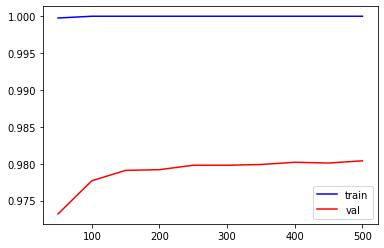

In [22]:
plt.figure()
plt.plot(n_estimators_list, accuracy_train, color='b', label='train')
plt.plot(n_estimators_list, accuracy_val, color='r', label='val')
plt.legend()

plt.show()